### Trace

La trace d'exécution d'un algorithme est constituée
en prenant une "photo" de toutes les variables de cet algorithme
aux instants suivants :
    
* au début
* à chaque `while`
* à la fin

La trace est un "comptee-rendu" de l'exécution de l'algorithme.

Donnez la trace d'exécution de l'algorithme suivant pour les valeurs suivantes de n : 91, 100, 500.

In [2]:
"""
:entrée n: entier
:pré-cond n ≥ 0
:sortie r: entier
:post-cond: r est la partie entière de la racine de n
"""
## exemple d'entrées
n = 91
##


r = 0
while r*r <= n:
    r = r+1
r = r-1

## pour voir la sortie
print(r)
##

9


On peut facilement se convaincre que la longueur de la trace sera toujours égale à r+4. En effet :

* la valeur finale de r correspond au nombre de fois où on est rentré dans la boucle, moins 1 (à cause de la ligne 18).
* La taille de la trace est ici égale

   * au nombre de fois où on est entré dans la boucle,
   * plus 1 pour le passage à la ligne 13 qui *sort* de la boucle,
   * plus 1 pour la photo de départ,
   * plus 1 pour la photo à la fin,
   
  soit (nombre de passages dans la boucle) + 3, soit r + 4.

Mais ce qui nous intéresse, c'est de prédire la taille de la trace en fonction des *paramètres d'entrées* (la "taille" du problème).

En l'occurence, puisque r est la partie entière de √n, on peut affirmer que la longueur de la trace est partie_entière(√n)+4, qu'on peut simplifier en disant qu'elle est *proportionnelle à √n*.

### Complexité

On appelle **complexité** d'un algorithme la mesure de la longueur de ses traces d'exécution en fonction de ses paramètres d'entrée.

Ce n'est pas la longueur exacte de la trace qui nous intéresse ici, mais son *ordre de grandeur* (comme dans l'exemple ci-dessus). C'est pourquoi on utilise la notation 𝓞(...) qui sert justement à représenter les ordres de grandeur.

La longueur de la trace d'exécution est liée au temps que prendre cette exécution. Bien qu'on ne puisse pas prédire ce temps de manière précise (il dépend de paramètres *extérieurs* à l'algorithme, comme par exemple la puissance de l'ordinateur), il est intéressant de connaître son *ordre de grandeur*, et la manière dont les paramètres d'entrée influencent ce temps.

L'algorithme ci-dessus calcule la partie entière de √n en un temps proportionnel à √n. On dira qu'il a « un temps d'exécution en 𝓞(√n) ».

On peut faire mieux avec l'algorithme ci-dessous :

In [6]:
## exemple d'entrées
n = 91
##

min = 0
max = n
while max-min > 1:
    moy = (max+min)//2
    if moy*moy <= n:
        min = moy
    else:
        max = moy
r = min

## pour voir la sortie
print(r)
##

9


L'algorithme ci-dessus applique une recherche **dichotomique** :
on utilise le fait que
* la racine de n est forcément comprise entre 0 et n, et que
* les racines de deux nombres sont dans le même ordre que ces nombres.

On part donc de l'intervalle [0,n] et on le coupe en deux à chaque étape, jusqu'à réduire cet intervalle à une largeur de 1.

Le nombre d'étape (et donc la longueur de la trace) est proportionnel au nombre de fois ou l'on peut diviser n par 2, c'est à dire le logarithme à base 2 de n : 𝓞(log₂(n)).

On peut se convaincre, avec les courbe ci-dessous, que cet algorithme est bien plus efficace que le précédent.

Populating the interactive namespace from numpy and matplotlib


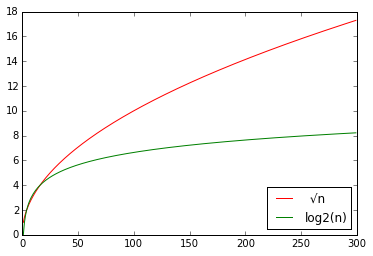

In [23]:
%pylab inline
xs = range(1,300)
plot(xs, sqrt(xs), "r-", label=" √n")
plot(xs, log2(xs), "g-", label="log2(n)")
legend(loc="lower right")


### Calcul de la racine carrée

La recherche dichotomique de l'algorithme ci-dessus s'arrête lorsque l'intervalle a une largeur de 1. Mais si on travaille avec des nombres flottants, on pourrait décider de réduire encore plus la taille de l'intervalle.

On définit donc un nouvel algorithme, prenant cette fois deux paramètres d'entrée :
* *x*, le nombre flottant dont on veut calculer la racine carrée,
* *erreur*, l'erreur maximale que l'on accepte d'avoir sur le résultat

In [27]:
"""
:entrée x: flottant
:entrée erreur: flottant
:pré-cond x ≥ 0
:sortie r: entier
:post-cond: r est la racine de 'x' à 'erreur' près
"""
## exemple d'entrées
x=500
precision=0.001
##

# AUTRE SOLUTION #
min = 0
max = x
while max-min > erreur:
    moy = (max+min)/2
    if moy*moy <= x:
        min = moy
    else:
        max = moy
r = min

## pour voir la sortie
print(r)
# et la vérifier 
print(r*r)
##

22.359848022460938
499.9628035875503


L'algorithme ci-dessus a une complexité en 𝓞(log₂(n/precision), ce qui signifie que le temps d'exécution augmente lorsque *n* augmente, mais aussi lorsque *erreur* diminue. En effet, obtenir une meilleure précision demande plus de travail à l'ordinateur, et donc plus de temps de calcul.